## Exploratory Data Analysis

Now that our dtm was created, we can use it to perform some preliminary analyses before we perform sentiment analysis or topic modelling

In [1]:
import pandas as pd
import pickle

data = pd.read_pickle('pickle\\data_dtm.pkl')
data = data.transpose() # EDA easier to perform on tdm
data

Howls Moving Castle  Spirited Away  Princess Mononoke  \
aaagh                       0              0                  0   
aah                         0              0                  0   
aam                         1              0                  0   
aaron                       0              0                  0   
abandon                     0              0                  1   
...                       ...            ...                ...   
zooming                     0              0                  0   
zubunure                    0              0                  0   
zuri                        0              0                  0   
zylak                       0              0                  0   
zylaks                      0              0                  0   

          From Up on Poppy Hill  The Secret World of Arietty  Ponyo  \
aaagh                         0                            0      0   
aah                           0                            0      0   
aam                           0                            0      0   
aaron                         0                            0      0   
abandon                       0                            0      1   
...                         ...                          ...    ...   
zooming                       0                            0      0   
zubunure                      0                            0      0   
zuri                          0                            0      0   
zylak                         0                            0      0   
zylaks                        0                            0      0   

          Whisper of the Heart  Porco Rosso  Kiki's Delivery Service  \
aaagh                        0            0                        0   
aah                          3            0                        0   
aam                          0            0                        0   
aaron                        0            0                        0   
abandon                      0            0                        0   
...                        ...          ...                      ...   
zooming                      0            0                        1   
zubunure                     0            0                        0   
zuri                         0            0                        0   
zylak                        0            0                        0   
zylaks                       0            0                        0   

          My Neighbor Totoro  ...  Doctor Strange  \
aaagh                      0  ...               0   
aah                        0  ...               0   
aam                        0  ...               0   
aaron                      0  ...               0   
abandon                    0  ...               0   
...                      ...  ...             ...   
zooming                    0  ...               0   
zubunure                   1  ...               0   
zuri                       0  ...               0   
zylak                      0  ...               0   
zylaks                     0  ...               0   

          Guardians of the Galaxy Vol 2  Spider-Man Homecoming  Thor Ragnarok  \
aaagh                                 0                      0              0   
aah                                   0                      0              0   
aam                                   0                      0              0   
aaron                                 0                      1              0   
abandon                               0                      0              0   
...                                 ...                    ...            ...   
zooming                               0                      0              0   
zubunure                              0                      0              0   
zuri                                  0                      0              0   
zylak                                 2 

It will be best to remove meaningless words that are said often between all the movies. This will give us better results when we try to look at the individual topics of each movie.

In [2]:
top_words = {}
for movie in data.columns:
    word = data[movie].sort_values(ascending=False).head(30)
    top_words[movie] = list(zip(word.index, word.values))
    
top_words

{'Howls Moving Castle': [('howl', 79),
  ('sophie', 75),
  ('im', 74),
  ('dont', 49),
  ('youre', 38),
  ('ill', 38),
  ('calcifer', 31),
  ('witch', 29),
  ('like', 28),
  ('oh', 27),
  ('right', 24),
  ('hae', 24),
  ('sure', 23),
  ('just', 23),
  ('look', 23),
  ('time', 21),
  ('arkl', 20),
  ('spell', 20),
  ('hes', 19),
  ('come', 19),
  ('away', 19),
  ('good', 19),
  ('heart', 18),
  ('nd', 18),
  ('got', 18),
  ('hey', 17),
  ('grandma', 16),
  ('going', 16),
  ('suliman', 16),
  ('waste', 15)],
 'Spirited Away': [('haku', 54),
  ('im', 46),
  ('sen', 44),
  ('dont', 44),
  ('youre', 36),
  ('just', 34),
  ('ill', 32),
  ('right', 32),
  ('chihiro', 29),
  ('work', 27),
  ('thats', 25),
  ('got', 25),
  ('thank', 24),
  ('good', 22),
  ('oh', 21),
  ('want', 20),
  ('hes', 20),
  ('yes', 20),
  ('come', 19),
  ('look', 18),
  ('let', 17),
  ('um', 17),
  ('way', 17),
  ('did', 17),
  ('baby', 17),
  ('yubaba', 17),
  ('lets', 17),
  ('turn', 16),
  ('whats', 16),
  ('lin', 1

In [3]:
for movie, words in top_words.items():
    print(movie)
    print(', '.join([word for word, count in words[0:15]]))
    print('-------')

Howls Moving Castle
howl, sophie, im, dont, youre, ill, calcifer, witch, like, oh, right, hae, sure, just, look
-------
Spirited Away
haku, im, sen, dont, youre, just, ill, right, chihiro, work, thats, got, thank, good, oh
-------
Princess Mononoke
forest, dont, come, im, right, spirit, just, youre, like, san, kill, eboshi, stop, want, look
-------
From Up on Poppy Hill
umi, youre, dont, thanks, come, im, good, ill, like, just, right, morning, shun, yes, need
-------
The Secret World of Arietty
im, arrietty, mother, house, just, little, papa, dont, haru, right, thats, ill, like, people, know
-------
Ponyo
ponyo, sosuke, risa, ok, like, dont, come, thank, oh, home, im, human, going, thats, lets
-------
Whisper of the Heart
shizuku, im, like, just, dont, youre, know, oh, hey, good, ill, want, going, thats, ive
-------
Porco Rosso
dont, im, going, pig, plane, porco, like, fight, air, want, curtis, hey, time, come, fio
-------
Kiki's Delivery Service
im, oh, kiki, dont, come, hey, just, ri

#### We can now take a look at what words in common are said the most between all the movies. This is a quick way of seeing common, meaningless words that don't add much in determining a topic

For example, we are likely to see 'im' as a common word among all the movies just by virtue of it being a stop word. We can add it later to our stop words and then observe topics

In [4]:
from collections import Counter

words = []
for movie in data.columns:
    top = [word for (word, count) in top_words[movie]]
    for t in top:
        words.append(t)
        
Counter(words).most_common()

[('im', 23),
 ('dont', 23),
 ('like', 22),
 ('just', 22),
 ('come', 22),
 ('right', 21),
 ('youre', 20),
 ('thats', 20),
 ('know', 18),
 ('oh', 16),
 ('good', 16),
 ('got', 14),
 ('look', 13),
 ('going', 13),
 ('okay', 13),
 ('time', 12),
 ('did', 12),
 ('think', 12),
 ('hey', 11),
 ('ill', 10),
 ('yes', 10),
 ('need', 10),
 ('yeah', 10),
 ('hes', 9),
 ('want', 9),
 ('gonna', 9),
 ('really', 8),
 ('way', 7),
 ('thank', 6),
 ('let', 6),
 ('lets', 5),
 ('whats', 5),
 ('ive', 5),
 ('father', 4),
 ('people', 4),
 ('sorry', 4),
 ('stark', 4),
 ('tell', 4),
 ('sure', 3),
 ('stop', 3),
 ('human', 3),
 ('guys', 3),
 ('home', 3),
 ('little', 3),
 ('didnt', 3),
 ('theres', 3),
 ('wait', 3),
 ('ok', 3),
 ('power', 3),
 ('stone', 3),
 ('peter', 3),
 ('thing', 3),
 ('help', 3),
 ('witch', 2),
 ('away', 2),
 ('kill', 2),
 ('theyre', 2),
 ('sir', 2),
 ('school', 2),
 ('house', 2),
 ('hope', 2),
 ('great', 2),
 ('granny', 2),
 ('make', 2),
 ('girl', 2),
 ('hurry', 2),
 ('mr', 2),
 ('tony', 2),
 ('man'

As you can see, in many cases all or almost all movies have particular words in common. To generate any meaningful insights for their differences, we should remove them. We will arbitrarily add >12 words to our stop word list and CounterVectorize it.

In [5]:
new_stopwords = [word for word, count in Counter(words).most_common() if count > 7]
new_stopwords

['im',
 'dont',
 'like',
 'just',
 'come',
 'right',
 'youre',
 'thats',
 'know',
 'oh',
 'good',
 'got',
 'look',
 'going',
 'okay',
 'time',
 'did',
 'think',
 'hey',
 'ill',
 'yes',
 'need',
 'yeah',
 'hes',
 'want',
 'gonna',
 'really']

In [6]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('pickle\\data_clean.pkl')

# We will now join the stock stop words with our new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(new_stopwords)

# We are now free to create a cv
cv = CountVectorizer(stop_words=stop_words) # creates dtm and removes stop words
data_cv = cv.fit_transform(data_clean.transcripts)
    # We use two methods of the CountVectorizer class
        # fit() learns the vocab of a document
        # transform() encodes a vector with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document
    # fit_transform() does both
        # Returns a sparse matrix
        
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index
data_stop

aaagh  aah  aam  aaron  abandon  abandoned  \
Howls Moving Castle                0    0    1      0        0          1   
Spirited Away                      0    0    0      0        0          2   
Princess Mononoke                  0    0    0      0        1          0   
From Up on Poppy Hill              0    0    0      0        0          0   
The Secret World of Arietty        0    0    0      0        0          0   
Ponyo                              0    0    0      0        1          0   
Whisper of the Heart               0    3    0      0        0          1   
Porco Rosso                        0    0    0      0        0          0   
Kiki's Delivery Service            0    0    0      0        0          0   
My Neighbor Totoro                 0    0    0      0        0          0   
Castle in the Sky                  0    0    0      0        0          0   
The Wind Rises                     0    0    0      0        0          0   
Captain America Civil War          0    0    0      0        0          0   
Doctor Strange                     0    0    0      0        0          0   
Guardians of the Galaxy Vol 2      0    0    0      0        0          0   
Spider-Man Homecoming              0    0    0      1        0          0   
Thor Ragnarok                      0    0    0      0        0          0   
Black Panther                      0    0    0      0        1          1   
Avengers Infinity War              0    0    0      0        0          0   
Ant-Man and the Wasp               0    0    0      0        0          0   
Captain Marvel                     0    0    0      0        0          0   
Spider-Man Far From Home           0    0    0      0        0          0   
Avengers Endgame                   1    2    0      0        0          0   

                               abducted  abilities  ability  ablaze  ...  \
Howls Moving Castle                   0          0        0       1  ...   
Spirited Away                         0          0        0       0  ...   
Princess Mononoke                     0          0        0       0  ...   
From Up on Poppy Hill                 0          0        0       0  ...   
The Secret World of Arietty           0          0        0       0  ...   
Ponyo                                 0          0        0       0  ...   
Whisper of the Heart                  0          0        1       0  ...   
Porco Rosso                           0          0        0       0  ...   
Kiki's Delivery Service               0          0        1       0  ...   
My Neighbor Totoro                    0          0        0       0  ...   
Castle in the Sky                     0          0        0       0  ...   
The Wind Rises                        0          0        0       0  ...   
Captain America Civil War             0          2        0       0  ...   
Doctor Strange                        0          0        0       0  ...   
Guardians of the Galaxy Vol 2         1          1        0       0  ...   
Spider-Man Homecoming                 0          0        0       0  ...   
Thor Ragnarok                         0          0        1       0  ...   
Black Panther                         0          1        0       0  ...   
Avengers Infinity War                 0          0        1       0  ...   
Ant-Man and the Wasp                  0          0        0       0  ...   
Captain Marvel                        0          0        0       0  ...   
Spider-Man Far From Home              0          0        0       0  ...   
Avengers Endgame                      0          0        0       0  ...   

                               zhow  zip  zol  zolahave  zone  zooming  \
Howls Moving Castle               0    0    0         0     0        0   
Spirited Away                     1    0    0         0     0        0   
Princess Mononoke                 0    0    0         0     0        0   
From Up on Poppy Hill             0    0    0         0     0

In [7]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, width=600, height=400, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

movies = [
    'Howls Moving Castle',
    'Spirited Away',
    'Princess Mononoke',
    'From Up on Poppy Hill',
    'The Secret World of Arietty',
    'Ponyo',
    'Whisper of the Heart',
    'Porco Rosso',
    'Kiki\'s Delivery Service',
    'My Neighbor Totoro',
    'Castle in the Sky',
    'The Wind Rises',
    'Captain America Civil War',
    'Doctor Strange',
    'Guardians of the Galaxy Vol 2',
    'Spider-Man Homecoming',
    'Thor Ragnarok',
    'Black Panther',
    'Avengers Infinity War',
    'Ant-Man and the Wasp',
    'Captain Marvel',
    'Spider-Man Far From Home',
    'Avengers Endgame'
]

<ipython-input-8-844a33dd92a8>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(120,80))


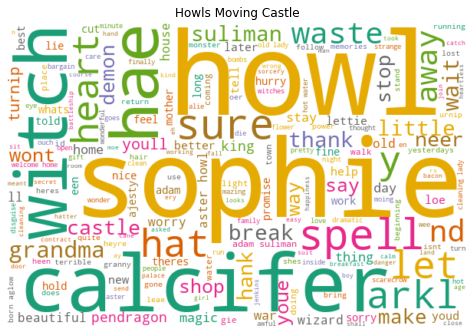

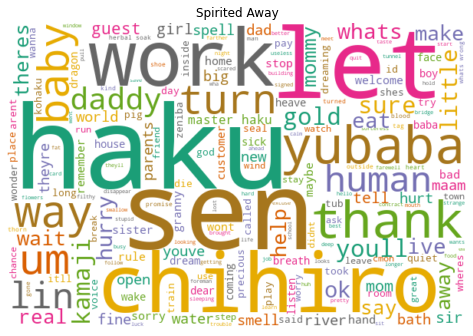

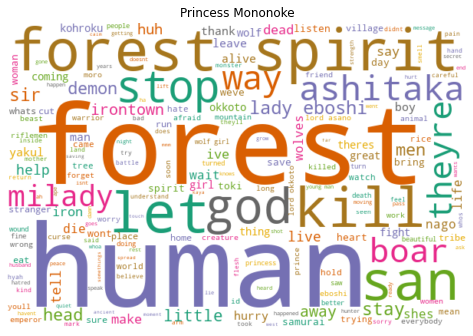

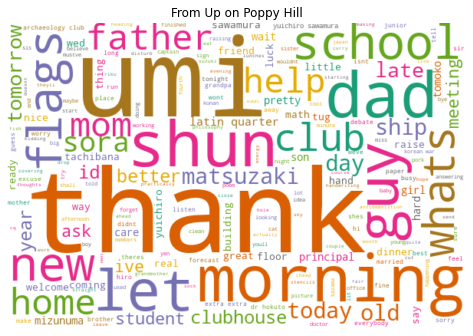

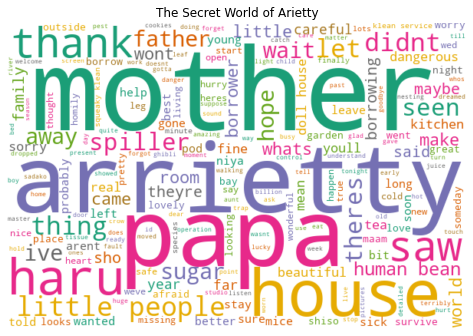

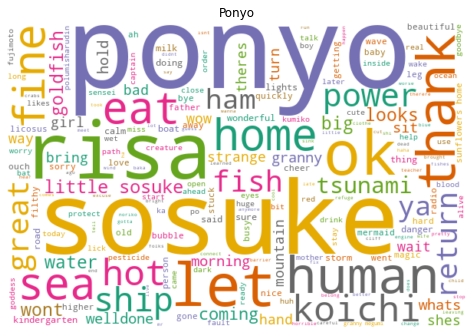

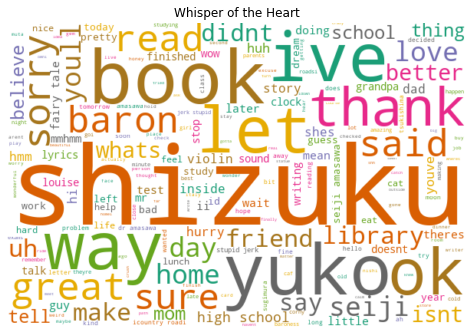

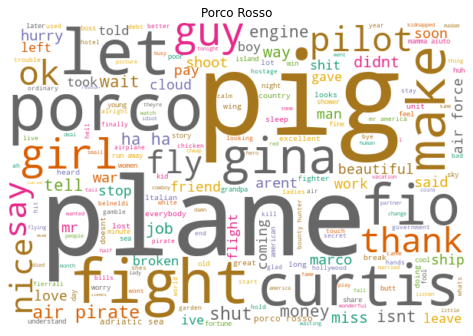

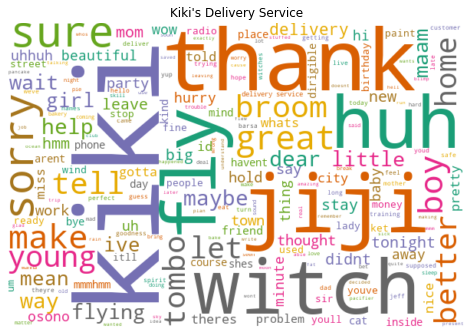

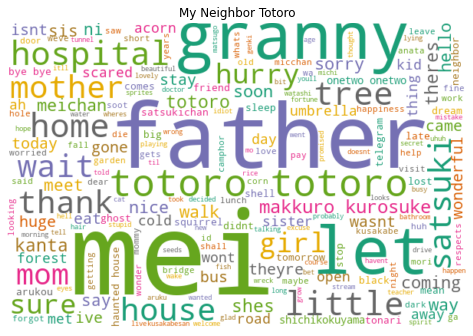

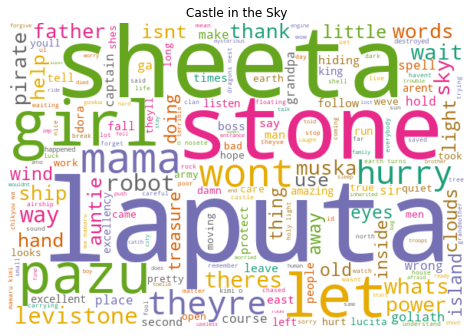

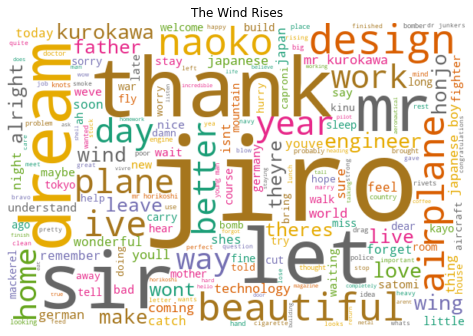

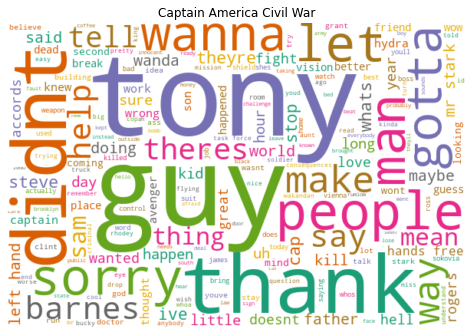

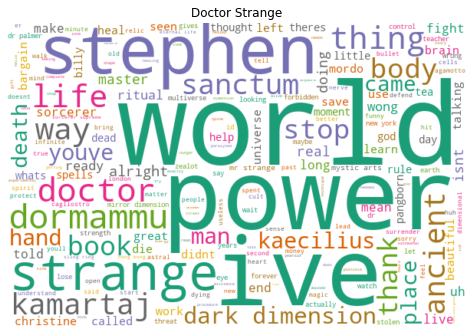

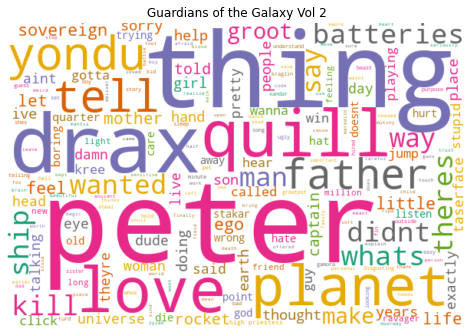

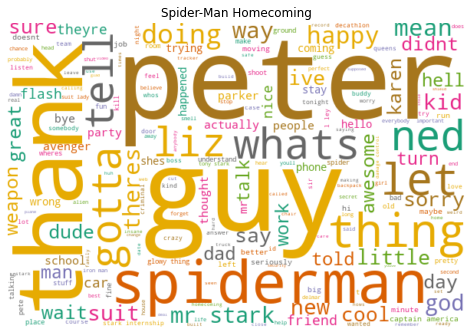

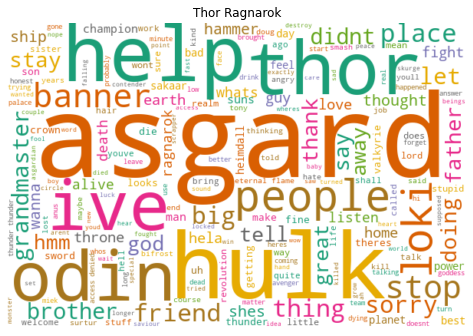

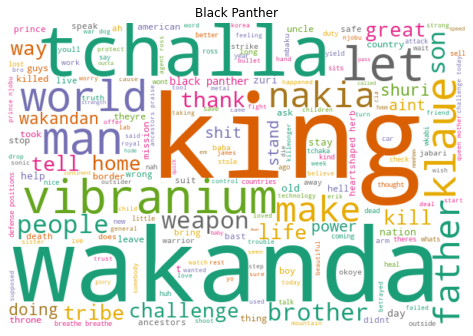

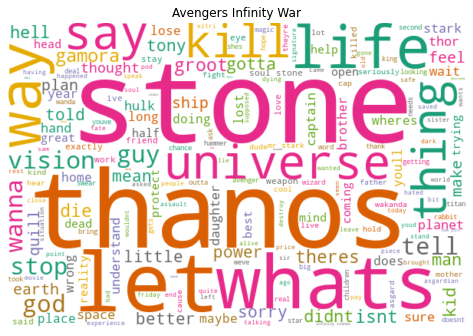

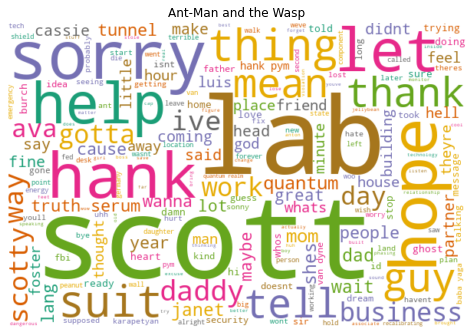

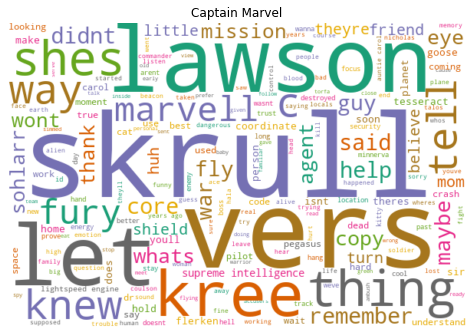

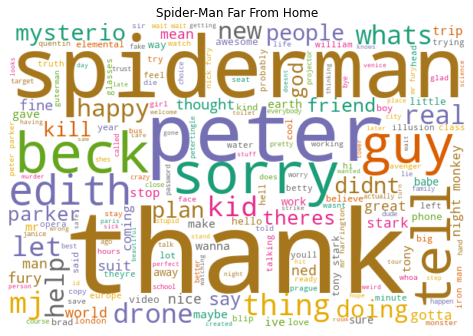

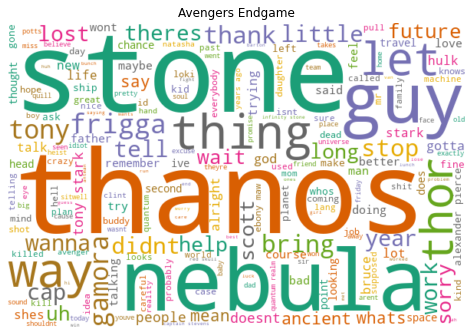

In [8]:
# Reset the output dimensions
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [16, 6]


# Create subplots for each movie
for index, movie in enumerate(data.columns):
    wc.generate(data_clean.transcripts[movie])
    
    plt.figure(figsize=(120,80))
    plt.subplot(12, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(movies[index])
    
plt.show()

In [10]:
# We will now save this dtm

data_stop.to_pickle("pickle\\data_stop.pkl")